In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime, date, timedelta

In [105]:
def import_process_data_for_eda(caiso):
    """
    Imports master
    """
    caiso = pd.read_csv('data/caiso_master.csv')
    caiso.drop('Unnamed: 0', axis=1, inplace=True)
    caiso['INTERVAL_START_PT'] = pd.to_datetime(caiso['INTERVAL_START_PT']).apply(lambda x: x.replace(tzinfo=None))
    caiso['INTERVAL_END_PT'] = pd.to_datetime(caiso['INTERVAL_END_PT']).apply(lambda x: x.replace(tzinfo=None))
    caiso['date_hour_start'] = pd.to_datetime(caiso['date_hour_start']).apply(lambda x: x.replace(tzinfo=None))
    caiso['OPR_DT_PT'] = pd.to_datetime(caiso['OPR_DT_PT'])
    caiso.set_index('INTERVAL_START_PT', inplace=True)
    caiso.rename({'HH_$_million_BTU_not_seasonal_adj': 'HH_$_mill_BTU', 'total_mw':'total_gen'},axis=1, inplace=True)
    caiso['HH_$_mill_BTU'] = pd.to_numeric(caiso['HH_$_mill_BTU'])
    apr_30_20 = caiso[caiso['OPR_DT_PT'] == '2020-04-30']
    end_may20_hrly = pd.concat([apr_30_20, apr_30_20, apr_30_20, apr_30_20], axis=0)
    beg_may_arr = pd.date_range(start='2020-05-01', end='2020-05-05', freq='H')[:-1]
    end_may20_hrly.set_index(beg_may_arr, inplace=True)
    caiso_eda = pd.concat([caiso, end_may20_hrly], axis=0)
    caiso_eda.sort_index()
    caiso_eda['total_re'] = caiso_eda['solar'] + caiso_eda['wind']
    return caiso_eda

In [106]:
apr_30_20 = caiso[caiso['OPR_DT_PT'] == '2020-04-30']


end_may20_hrly = pd.concat([apr_30_20, apr_30_20, apr_30_20, apr_30_20], axis=0)
beg_may_arr = pd.date_range(start='2020-05-01', end='2020-05-05', freq='H')[:-1]
end_may20_hrly.set_index(beg_may_arr, inplace=True)
# end_may20_hrly.head()


In [107]:
caiso_eda = import_process_data_for_eda()

In [91]:
sns.scatterplot(x='prcnt_re_total', y='$_MWH_np15', data=merge_attempt)

ValueError: Could not interpret input 'prcnt_re_total'

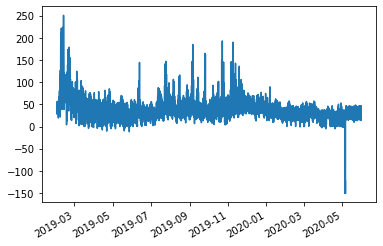

In [93]:
merge_attempt['$_MWH_sp15'].plot()

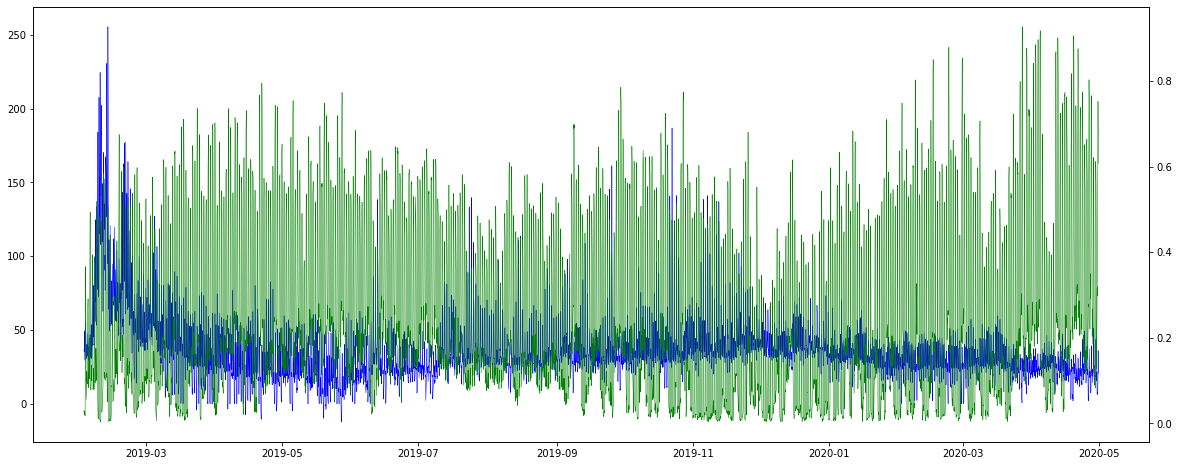

In [46]:
fig, ax1 = plt.subplots(figsize=(20,8))

ax1.plot(caiso_b4_may20.index, caiso_b4_may20['$_MWH_np15'], linewidth=0.5, color='blue', alpha=1)

ax2=ax1.twinx()

ax2.plot(caiso_b4_may20.index, caiso_b4_may20['prcnt_re_gen'], linewidth=0.5, color='green', alpha=1)

In [37]:
caiso[caiso['OPR_DT_PT'] == '2020-05-05']

,INTERVAL_END_PT,date_hour_start,OPR_DT_PT,OPR_HR_PT,day_week,OPR_INTERVAL,$_MWH_np15,$_MWH_sp15,$_MWH_zp26,other,solar,wind,total_gen,net_exp_MW,load_MW,HH_$_mill_BTU
INTERVAL_START_PT,,,,,,,,,,,,,,,,
2020-05-05 00:00:00,2020-05-05 01:00:00,2020-05-05 00:00:00,2020-05-05,1,1,0,-150.00000,-150.00000,-150.00000,9246.17,7855.18,2428.39,19529.74,-107999.87,311438.75,1.93
2020-05-05 01:00:00,2020-05-05 02:00:00,2020-05-05 01:00:00,2020-05-05,2,1,0,-150.00000,-150.00000,-150.00000,12218.63,3832.52,2812.56,18863.71,-119017.06,325703.34,1.93
2020-05-05 02:00:00,2020-05-05 03:00:00,2020-05-05 02:00:00,2020-05-05,3,1,0,-150.00000,-150.00000,-150.00000,15088.38,641.68,3063.29,18793.35,-124891.45,330727.45,1.93
2020-05-05 03:00:00,2020-05-05 04:00:00,2020-05-05 03:00:00,2020-05-05,4,1,0,-150.61575,-150.61575,-150.61575,15189.64,3.82,3182.33,18375.79,-127048.64,331188.40,1.93
2020-05-05 04:00:00,2020-05-05 05:00:00,2020-05-05 04:00:00,2020-05-05,5,1,0,-150.61575,-150.61575,-150.61575,13581.83,0.55,3155.98,16738.36,-113905.49,314485.10,1.93
2020-05-05 05:00:00,2020-05-05 06:00:00,2020-05-05 05:00:00,2020-05-05,6,1,0,-150.61575,-150.61575,-150.61575,11646.66,0.00,3016.60,14663.26,-108150.93,290713.42,1.93
2020-05-05 06:00:00,2020-05-05 07:00:00,2020-05-05 06:00:00,2020-05-05,7,1,0,-150.61575,-150.61575,-150.61575,10535.00,0.00,2828.01,13363.01,-95280.59,269365.54,1.93
2020-05-05 07:00:00,2020-05-05 08:00:00,2020-05-05 07:00:00,2020-05-05,8,1,0,-149.23000,-149.23000,-149.23000,17972.14,0.00,4477.44,22449.58,-191764.94,506448.84,1.93
2020-05-05 08:00:00,2020-05-05 09:00:00,2020-05-05 08:00:00,2020-05-05,9,1,0,-149.23000,-149.23000,-149.23000,16553.02,0.00,4374.80,20927.82,-192700.08,480767.28,1.93


In [28]:
caiso['OPR_DT_PT']

INTERVAL_START_PT
2019-02-01 01:00:00   2019-02-01
2019-02-01 02:00:00   2019-02-01
2019-02-01 03:00:00   2019-02-01
2019-02-01 04:00:00   2019-02-01
2019-02-01 05:00:00   2019-02-01
                         ...    
2020-05-30 19:00:00   2020-05-30
2020-05-30 20:00:00   2020-05-30
2020-05-30 21:00:00   2020-05-30
2020-05-30 22:00:00   2020-05-30
2020-05-30 23:00:00   2020-05-30
Name: OPR_DT_PT, Length: 11519, dtype: datetime64[ns]

## Time Series Lag Scatter Plots

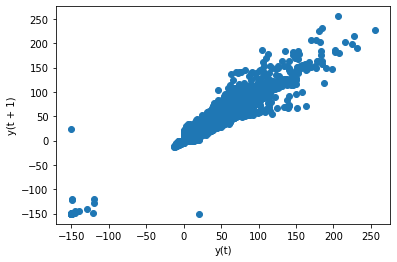

In [92]:
pd.plotting.lag_plot(merge_attempt['$_MWH_np15'])

In [108]:
caiso_daily = caiso_eda.groupby('OPR_DT_PT').agg(func='sum').reset_index()
# caiso_daily.drop('prcnt_re_gen', axis=1, inplace=True) 
caiso_daily['prcnt_re_gen'] = (caiso_daily['solar'] + caiso_daily['wind']) / caiso_daily['total_gen']

In [ ]:
def fit_moving_average_trend(series, window=6):
#    return pd.rolling_mean(series, window, center=True)
    return series.rolling(window, center=True).mean()

def plot_moving_average_trend(ax, name, series, window=6):
       moving_avg = seris.rolling(window, center=True).mean()

    plot_trend_data(ax, name, series)
    ax.plot(series.index.date, moving_average_trend)

findfont: Font family ['garamond'] not found. Falling back to DejaVu Sans.
findfont: Font family ['garamond'] not found. Falling back to DejaVu Sans.


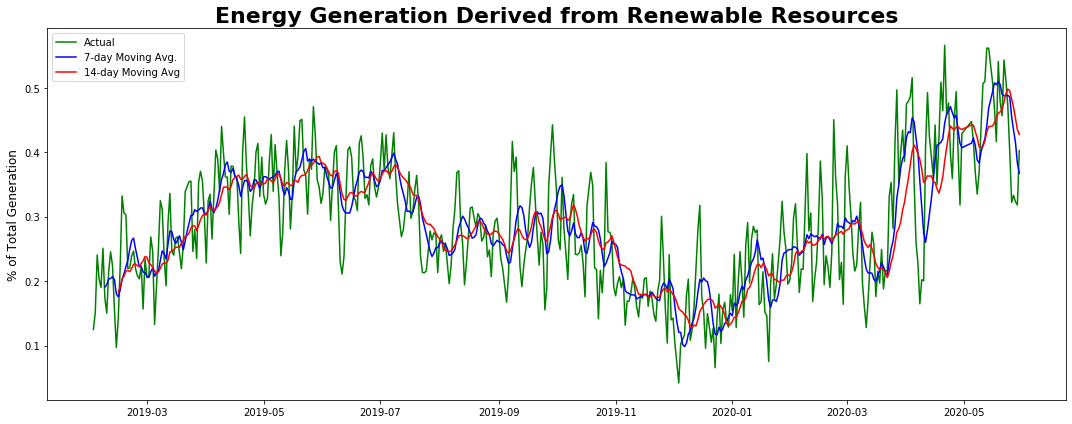

In [126]:
fig, ax = plt.subplots(figsize=(15,6))
# plt.rcParams['font.family'] = 'garamond'
rolling7= caiso_daily['prcnt_re_gen'].rolling(7).mean()
rolling14 = caiso_daily['prcnt_re_gen'].rolling(14).mean()
date_arr = caiso_daily['OPR_DT_PT']

ax.plot(date_arr, caiso_daily['prcnt_re_gen'], color='green', label='Actual')
ax.plot(date_arr, rolling7, color='blue', label='7-day Moving Avg.')
ax.plot(date_arr, rolling14, color='red', label='14-day Moving Avg')
ax.set_ylabel('% of Total Generation', fontsize=12)
ax.set_title('Energy Generation Derived from Renewable Resources', fontsize=22, fontweight='bold')
# ax.set_xlim(-0.5, len(date_arr))
ax.legend()
plt.tight_layout();

In [112]:
rolling_mean = df.y.rolling(window=20).mean()
rolling_mean2 = df.y.rolling(window=50).mean()

plt.plot(df.ds, df.y, label='AMD')
plt.plot(df.ds, rolling_mean, label='AMD 20 Day SMA', color='orange')
plt.plot(df.ds, rolling_mean2, label='AMD 50 Day SMA', 

['NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN', 'NaN']